In [7]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [8]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [10]:
df_exploded = df.explode('job_skills')

In [16]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [21]:
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)
df_skills_count 

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


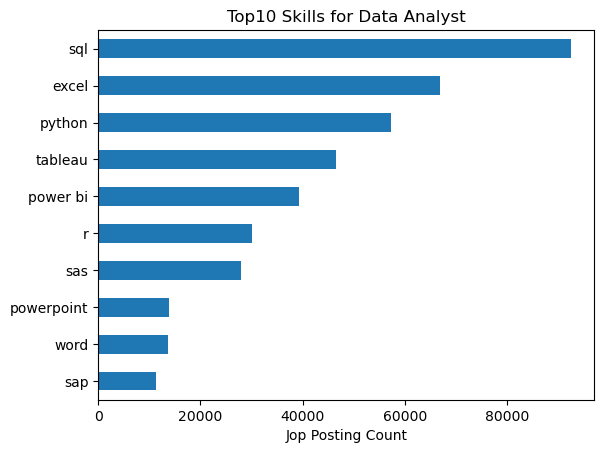

In [32]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh', x = 'job_skills', y = 'skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top{top_skills} Skills for {job_title}')
plt.xlabel('Jop Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()